# Final Project:
## sklearn.neural_network.MLPClassifier

In [1]:

import pandas as pd
import wave
import struct
import glob
import os
import warnings
import librosa
import librosa.display
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

%matplotlib inline
warnings.filterwarnings('ignore')

def parse_wave_python(filename):
    with wave.open(filename, 'rb') as wave_file:
        sample_rate = wave_file.getframerate()
        length_in_seconds = wave_file.getnframes() / sample_rate
        
        first_sample = struct.unpack(
            '<h', wave_file.readframes(1))[0]
        second_sample = struct.unpack(
            '<h', wave_file.readframes(1))[0]
    print('''
Parsed {filename}
-----------------------------------------------
Channels: {num_channels}
Sample Rate: {sample_rate}
First Sample: {first_sample}
Second Sample: {second_sample}
Length in Seconds: {length_in_seconds}'''.format(
            filename=filename,
            num_channels=wave_file.getnchannels(),
            sample_rate=wave_file.getframerate(),
            first_sample=first_sample,
            second_sample=second_sample,
            length_in_seconds=length_in_seconds))
        
parse_wave_python('urban-sound-classification/train/Train/1.wav')


Parsed urban-sound-classification/train/Train/1.wav
-----------------------------------------------
Channels: 1
Sample Rate: 48000
First Sample: -3939
Second Sample: -4940
Length in Seconds: 4.0


In [2]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load
file_to_load = "urban-sound-classification/train.csv"

# Read Purchasing File and store into Pandas data frame
audio_classification = pd.read_csv(file_to_load)
audio_classification.head()

ID         Class
0   0         siren
1   1  street_music
2   2      drilling
3   3         siren
4   4      dog_bark

In [3]:
# iterating the columns 
for col in audio_classification.columns: 
    print(col) 

ID
Class


In [4]:
audio_classification.Class.unique()

array(['siren', 'street_music', 'drilling', 'dog_bark',
       'children_playing', 'gun_shot', 'engine_idling', 'air_conditioner',
       'jackhammer', 'car_horn'], dtype=object)

In [5]:

def load_sound_files(file_paths):
    raw_sounds = []
    for fp in file_paths:
        X,sr = librosa.load(fp)
        raw_sounds.append(X)
    return raw_sounds

def plot_waves(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60), dpi = 300)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        librosa.display.waveplot(np.array(f),sr=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle("Figure 1: Waveplot",x=0.5, y=0.915,fontsize=18)
    plt.show()
    


In [6]:
sound_file_paths = ["urban-sound-classification/train/Train/43.wav","urban-sound-classification/train/Train/38.wav","urban-sound-classification/train/Train/63.wav","urban-sound-classification/train/Train/68.wav",
"urban-sound-classification/train/Train/56.wav","urban-sound-classification/train/Train/59.wav","urban-sound-classification/train/Train/228.wav",
"urban-sound-classification/train/Train/103.wav","urban-sound-classification/train/Train/153.wav","urban-sound-classification/train/Train/131.wav"]

sound_names = ['siren', 'street_music', 'drilling', 'dog_bark',
       'children_playing', 'gun_shot', 'engine_idling', 'air_conditioner',
       'jackhammer', 'car_horn']


raw_sounds = load_sound_files(sound_file_paths)
plot_waves(sound_names,raw_sounds)


In [7]:
# Function to load in the spectrogram of each audio file
def file_loader(file_name):
    X, sample_rate = librosa.load(file_name, duration=2.97)
    ps = librosa.feature.melspectrogram(y=X, sr=sample_rate)
    return ps

In [8]:
# create a unique list of all audio sound choices
catalog = audio_classification['Class'].unique().tolist()
catalog = [i for i in enumerate(catalog)]
catalog

[(0, 'siren'),
 (1, 'street_music'),
 (2, 'drilling'),
 (3, 'dog_bark'),
 (4, 'children_playing'),
 (5, 'gun_shot'),
 (6, 'engine_idling'),
 (7, 'air_conditioner'),
 (8, 'jackhammer'),
 (9, 'car_horn')]

In [9]:
# create an array for "Y"
labels = np.empty(0)
# create list of arrays for "X"
transformed_samples = []
# pull through the data and load each file
for i in range(audio_classification.shape[0]):
    number = audio_classification.iloc[i,0]
    label = audio_classification.iloc[i,1]
    filename = f'{number}.wav'
    lbl = f'{label}'
    try:
        ps = file_loader(f'urban-sound-classification/train/Train/{filename}')
        if ps.shape != (128, 128): continue
    except:
        print(f"File {filename} didn't work")
        continue
    transformed_samples.append(np.reshape(ps, -1))
    #load in the labels into Y by number
    if label == catalog[0][1]:
        labels = np.append(labels, catalog[0][0])
    elif label == catalog[1][1]:
        labels = np.append(labels, catalog[1][0])
    elif label == catalog[2][1]:
        labels = np.append(labels, catalog[2][0])
    elif label == catalog[3][1]:
        labels = np.append(labels, catalog[3][0])
    elif label == catalog[4][1]:
        labels = np.append(labels, catalog[4][0])
    elif label == catalog[5][1]:
        labels = np.append(labels, catalog[5][0])
    elif label == catalog[6][1]:
        labels = np.append(labels, catalog[6][0])
    elif label == catalog[7][1]:
        labels = np.append(labels, catalog[7][0])
    elif label == catalog[8][1]:
        labels = np.append(labels, catalog[8][0])
    elif label == catalog[9][1]:
        labels = np.append(labels, catalog[9][0])

File 17.wav didn't work
File 66.wav didn't work
File 79.wav didn't work
File 82.wav didn't work
File 152.wav didn't work
File 184.wav didn't work
File 301.wav didn't work
File 337.wav didn't work
File 445.wav didn't work
File 447.wav didn't work
File 453.wav didn't work
File 473.wav didn't work
File 475.wav didn't work
File 525.wav didn't work
File 612.wav didn't work
File 614.wav didn't work
File 622.wav didn't work
File 639.wav didn't work
File 655.wav didn't work
File 688.wav didn't work
File 719.wav didn't work
File 720.wav didn't work
File 749.wav didn't work
File 798.wav didn't work
File 865.wav didn't work
File 1003.wav didn't work
File 1061.wav didn't work
File 1079.wav didn't work
File 1085.wav didn't work
File 1143.wav didn't work
File 1149.wav didn't work
File 1152.wav didn't work
File 1175.wav didn't work
File 1176.wav didn't work
File 1271.wav didn't work
File 1321.wav didn't work
File 1323.wav didn't work
File 1347.wav didn't work
File 1351.wav didn't work
File 1352.wav d

In [10]:
# put transformed_samples into dataframe
df_1 = pd.DataFrame(transformed_samples)
df_1.head()

0           1          2          3          4          5      \
0    9.912633   12.610701   9.300829   3.297573   4.655068   5.044219   
1    2.661400    4.117083   1.679421   1.527544   1.595737   2.088292   
2    0.005557    0.004293   0.002716   0.002533   0.006898   0.006982   
3    0.353371    0.096338   0.003695   0.004806   0.004052   0.013310   
4  166.046129  102.582782  34.110469  51.670868  44.564469  57.289162   

        6          7          8          9        ...            16374  \
0    1.048530   1.559219   1.782135   8.640504    ...     4.685921e-06   
1    6.244799   2.845641   0.872873   0.603950    ...     9.428515e-05   
2    0.005634   0.007432   0.014744   0.015015    ...     2.457749e-03   
3    0.013695   0.020970   0.015848   0.021949    ...     1.214701e-09   
4  119.480505  65.250017  64.334011  80.964602    ...     3.375942e-07   

          16375         16376         16377         16378         16379  \
0  7.909435e-06  9.165550e-06  6.099369e-06  6.530995e-06  5.510310e-06   
1  4.775995e-05  4.399524e-05  1.374228e-05  8.436620e-06  7.757358e-06   
2  2.147882e-03  2.373022e-03  2.072116e-03  2.920827e-03  2.892467e-03   
3  2.546348e-10  7.933098e-11  2.247661e-10  4.596068e-10  2.116015e-10   
4  2.726756e-07  4.011556e-07  4.404903e-07  4.052210e-07  5.836523e-07   

          16380         16381         16382     16383  
0  5.303133e-06  7.210522e-06  5.260210e-06  0.000420  
1  1.799225e-05  1.284928e-04  2.856303e-04  0.007425  
2  2.193557e-03  3.515167e-03  7.447198e-03  0.010343  
3  7.314918e-11  1.394108e-10  4.291821e-08  0.000476  
4  5.716864e-07  4.060787e-07  5.430899e-07  0.000350  

[5 rows x 16384 columns]

In [11]:
# add the Labels into the dataframe
df_1["Y"] = labels
df_1.head()

0           1          2          3          4          5  \
0    9.912633   12.610701   9.300829   3.297573   4.655068   5.044219   
1    2.661400    4.117083   1.679421   1.527544   1.595737   2.088292   
2    0.005557    0.004293   0.002716   0.002533   0.006898   0.006982   
3    0.353371    0.096338   0.003695   0.004806   0.004052   0.013310   
4  166.046129  102.582782  34.110469  51.670868  44.564469  57.289162   

            6          7          8          9 ...          16375  \
0    1.048530   1.559219   1.782135   8.640504 ...   7.909435e-06   
1    6.244799   2.845641   0.872873   0.603950 ...   4.775995e-05   
2    0.005634   0.007432   0.014744   0.015015 ...   2.147882e-03   
3    0.013695   0.020970   0.015848   0.021949 ...   2.546348e-10   
4  119.480505  65.250017  64.334011  80.964602 ...   2.726756e-07   

          16376         16377         16378         16379         16380  \
0  9.165550e-06  6.099369e-06  6.530995e-06  5.510310e-06  5.303133e-06   
1  4.399524e-05  1.374228e-05  8.436620e-06  7.757358e-06  1.799225e-05   
2  2.373022e-03  2.072116e-03  2.920827e-03  2.892467e-03  2.193557e-03   
3  7.933098e-11  2.247661e-10  4.596068e-10  2.116015e-10  7.314918e-11   
4  4.011556e-07  4.404903e-07  4.052210e-07  5.836523e-07  5.716864e-07   

          16381         16382     16383    Y  
0  7.210522e-06  5.260210e-06  0.000420  0.0  
1  1.284928e-04  2.856303e-04  0.007425  1.0  
2  3.515167e-03  7.447198e-03  0.010343  2.0  
3  1.394108e-10  4.291821e-08  0.000476  0.0  
4  4.060787e-07  5.430899e-07  0.000350  3.0  

[5 rows x 16385 columns]

In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df_1.drop("Y", axis=1), df_1["Y"], random_state=1)

In [13]:
# Scale the data
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
parameters = {'solver': ['adam'],
             'hidden_layer_sizes':np.arange(10, 15)}
             
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)




In [16]:
clf.fit(X_train, y_train)
print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))
print(clf.best_params_)
print(clf.best_score_)

Training set score: 0.798373
Test set score: 0.532069
{'hidden_layer_sizes': 14, 'solver': 'adam'}
0.5198915009041591


In [17]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=100, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

In [18]:
mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 2.20916928
Iteration 2, loss = 2.04689566
Iteration 3, loss = 1.94525744
Iteration 4, loss = 1.87085463
Iteration 5, loss = 1.80703360
Iteration 6, loss = 1.75439264
Iteration 7, loss = 1.70253351
Iteration 8, loss = 1.65164112
Iteration 9, loss = 1.61275297
Iteration 10, loss = 1.57168482
Training set score: 0.440928
Test set score: 0.389341


## Confusion Matrix:

In [19]:
predictions = clf.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions)
matrix

array = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

array

array([[0.48648649, 0.03378378, 0.03378378, 0.02027027, 0.29054054,
        0.        , 0.05405405, 0.08108108, 0.        , 0.        ],
       [0.07189542, 0.36601307, 0.05882353, 0.03267974, 0.13071895,
        0.        , 0.09150327, 0.17647059, 0.05882353, 0.0130719 ],
       [0.01785714, 0.00892857, 0.66071429, 0.00892857, 0.13392857,
        0.00892857, 0.01785714, 0.07142857, 0.0625    , 0.00892857],
       [0.17241379, 0.12643678, 0.03448276, 0.14942529, 0.34482759,
        0.        , 0.09195402, 0.04597701, 0.02298851, 0.01149425],
       [0.14788732, 0.0915493 , 0.03521127, 0.02816901, 0.5       ,
        0.        , 0.03521127, 0.14788732, 0.01408451, 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.05696203, 0.03797468, 0.        , 0.        , 0.11392405,
        0.        , 0.62658228, 0.12025316, 0.0443038 , 0.        ],
       [0.        , 0.01986755, 0.0066225

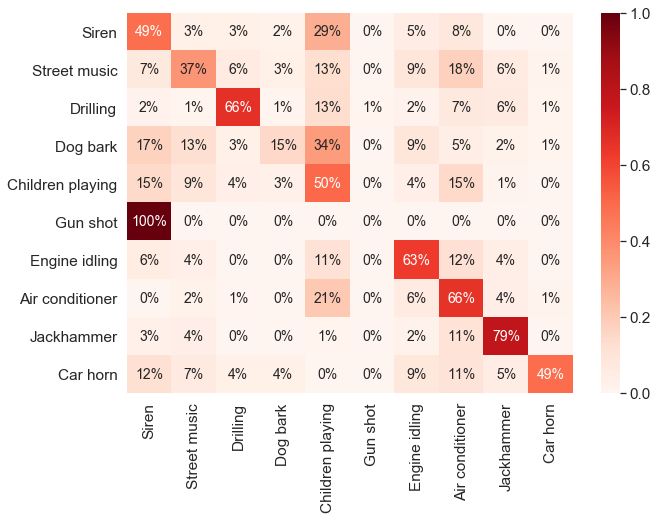

In [22]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(array, index = [i[1].replace('_', ' ').capitalize() for i in catalog],
                  columns = [i[1].replace('_', ' ').capitalize() for i in catalog])

sn.set(font_scale=1.4)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap='Reds',annot_kws={"size": 14}, fmt='.0%')# font size